# Introduction to Image Processing and Computer Vision

## Table of contents:
* What are Images?
* What is OpenCV?
* Setting up OpenCV on a Linux machine.
* What is Image Processing?
* Image processing example: "blurring" in action
* Core operations
    * Basic Operations on Images
        * Reading image using OpenCV
        * Access pixel values and modify them
        * Access image properties
        * Setting Region of Image (ROI)
        * Playing with individual channels
        * Making Borders for Images (Padding)
    * Arithmetic operations on images
        * Image Blending
        * Bitwise Operations
* Image processing in OpenCV
    * Image Thresholding
    * Geometric Transformation of images
        * Scaling
        * Translation
        * Rotation
    * Image Gradients
        * Sobel, Scharr, and Laplacian Derivatives
    * Canny Edge Detection
    
    
#### Inside this guide, you’ll get to know how to work with images using OpenCV library (Python implementation). I have assumed that you have a running linux OS preferably Ubuntu flavor (18.04 or higher) and have python3 installed.

____

## 1. What are images?

"**A picture is worth a thousand words**" is an English language adage meaning that complex and sometimes multiple ideas can be conveyed by a single still image, which conveys its meaning or essence more effectively than a mere verbal description.

Many of us may or may not know who is in the image but one thing we can surely say is that it is an image of a person.

#### This is an image of 16th U.S. President **Abraham Lincoln**

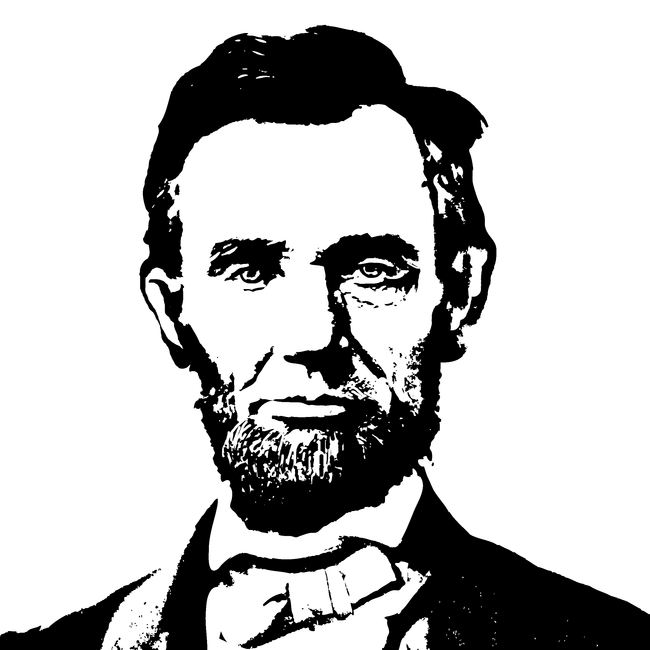

In [1]:
from IPython.display import Image
Image(filename='resources/lincon-image-binary.png', width=500, height=700)

* What we humans percieve just by looking at a picture, the same is not true for machines. In fact, for a computer, this is what an image looks like.

* **It is just an array of pixels** 

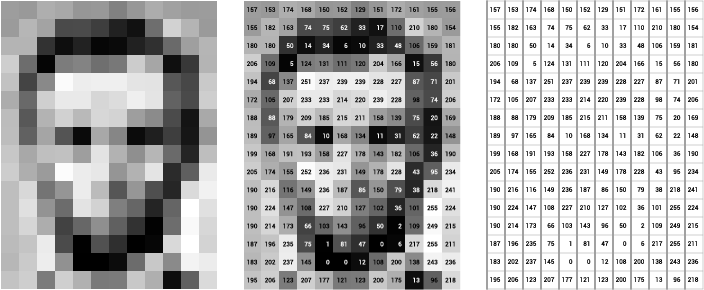

In [2]:
Image(filename='resources/lincon.png', width=900, height=600) 

* For the sake of simplicity, I have taken a black & white or technically speaking, a ****Binary** image!
* What we usually have around us these days are colored images. So what's the difference between a binary and a colored image?
* Binary images are the simplest type of images because they can take only two values: black or white, respectively, 0 or 1. This type of image is referred to as a 1-bit images because it’s enough to represent them with one binary digit. 
* They consist of 3 arrays or 3 channels stacked together which we percieve color.

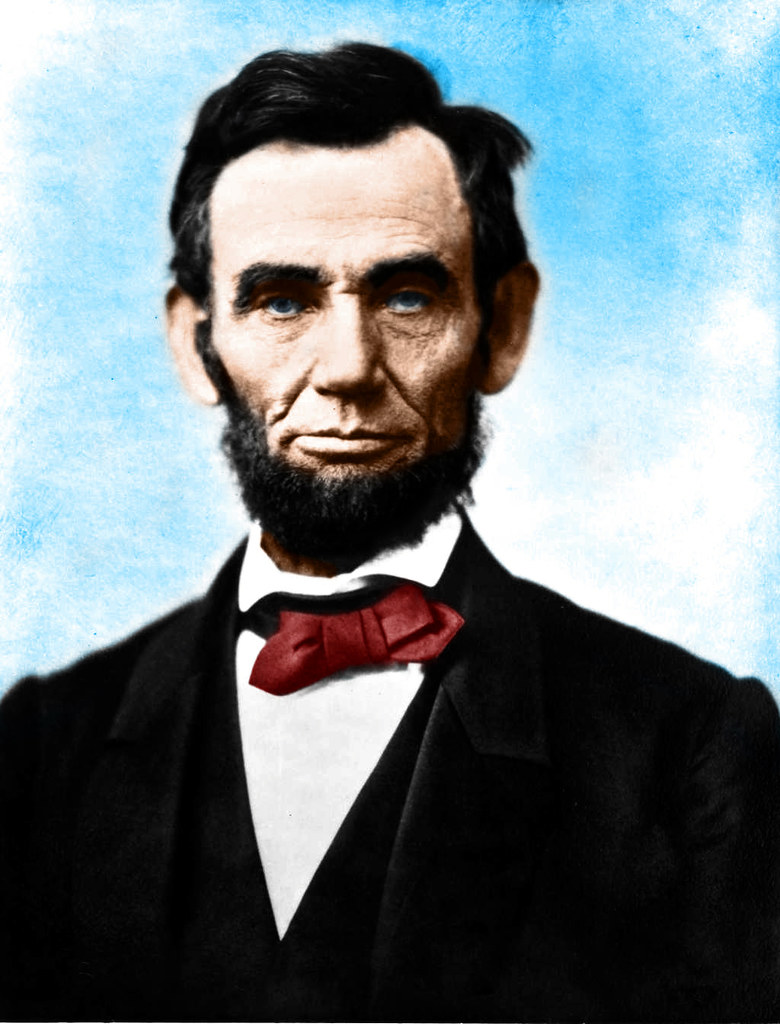

In [3]:
Image(filename='resources/lincon-image-color.jpg', width=500, height=700)

____

## 2. What is OpenCV?
* OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library that contains various functions to perform operations on pictures or videos. It was originally developed by Intel but was later maintained by Willow Garage and is now maintained by Itseez. This library is cross-platform that is it is available on multiple programming language such as Python, C++ etc.

For more information, check out the following links:
* https://opencv.org/about/
* https://github.com/opencv/opencv

_____

## 3. Setting-up OpenCV

While there are multiple guides available online for installing OpenCV, for my ease, I have put together all the commands in one handy shell script. Here it is: https://github.com/anujonthemove/opencv-installation


Some of poplular blogs/guides that I have used to compile my script: 
1. https://www.learnopencv.com/install-opencv-4-on-ubuntu-16-04/
2. https://www.pyimagesearch.com/2018/08/15/how-to-install-opencv-4-on-ubuntu/

____

## 4. What is Image Processing?
Image processing is essentially application of mathematical operations on images which gives us a transformed image. To call out, some of the commonly known transformations include blurring, sharpening, resizing, rotating etc.

## 5. Let us see the operation of "blurring" an image in action

In [4]:
%%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data


def f(Median_Size):
    selem = disk(int(Median_Size))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_median = rank.median(img_gray, selem=selem) 

    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    display(fig)

image = skimage.data.camera() #plt.imread("Test.png")       
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(14, 12))

ax_orig = fig.add_subplot(121) 
ax_orig.axis('off')

ax_neu = fig.add_subplot(122) 
ax_neu.axis('off')

ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")

In [5]:
interact(f, Median_Size=widgets.IntSlider(min=0,max=20,step=2,value=0));

interactive(children=(IntSlider(value=0, description='Median_Size', max=20, step=2), Output()), _dom_classes=(…

____

## 6. Core operations

### 6.a. Basic Operations on Images
* Reading image using OpenCV
* Access pixel values and modify them
* Access image properties
* Setting Region of Image (ROI)
* Playing with individual channels
* Making Borders for Images (Padding)

### 1. Reading image using OpenCV

In [6]:
import cv2 # <- opencv library import, that's it!
import numpy as np # <- library for storing images as arrays and for doing mathematical operations

In [7]:
img = cv2.imread('./resources/messi.jpg')

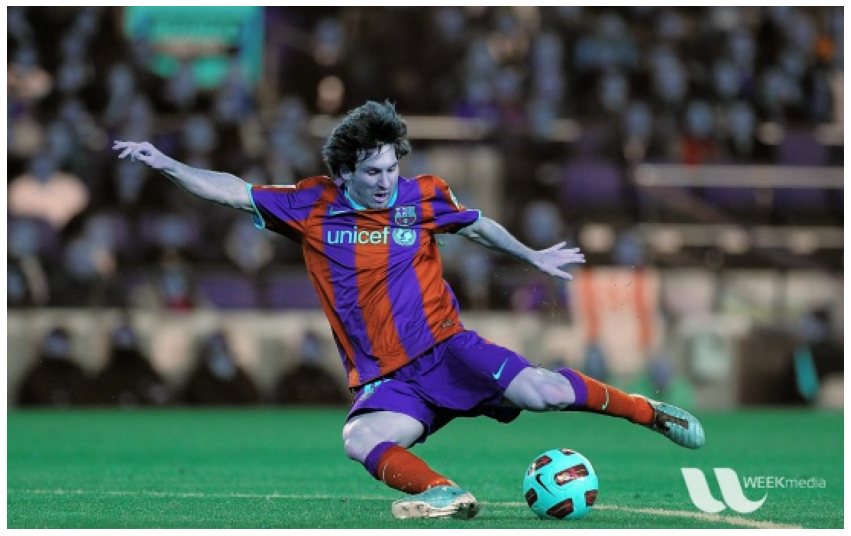

In [8]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img)
plt.show()

### Note: 
We can see something is off in this image. Messi's skin color is slightly blue? Well, the reason behind this is that OpenCV reads images in BGR format where as matplotlib works in RGB format therefore, in order to properly display this image we have to changed color space from BGR to RGB. Changing colorspaces is also we are going to see further in this guide.

In [9]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting from BGR to RGB channel

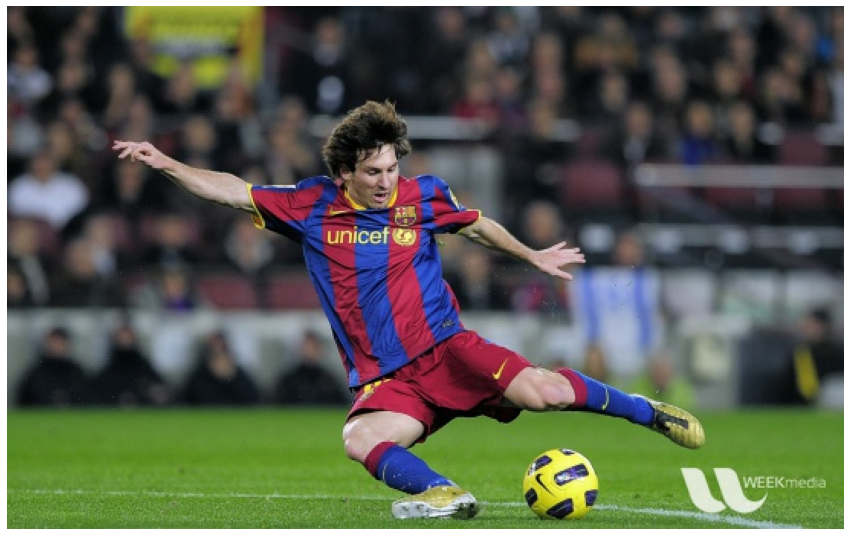

In [10]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

### 2. Accessing images(pixel values) using OpenCV and modify them

You can access a pixel value by its row and column coordinates. For RGB image, it returns an array of Red, Blue, Green values. For grayscale image, just corresponding intensity is returned.

#### 2.a. accessing R, G, B value at coordinate location (100, 100)

In [11]:
px = img_rgb[100,100] 
print(px)

[200 166 157]


#### 2.b. accessing only Red pixel values

In [12]:
px_red = img_rgb[100, 100, 0]
print(px_red)

200


#### 2.c. accessing only Green pixel values

In [13]:
px_green = img_rgb[100, 100, 1]
print(px_green)

166


#### 2.d. accessing only Blue pixel values

In [14]:
px_blue = img_rgb[100, 100, 2]
print(px_blue)

157


#### 2.e. modify the pixel values the same way.

In [15]:
img_rgb[100,100] = [255,255,255]
print(img_rgb[100, 100])

[255 255 255]


### 3. Accessing Image Properties
Image properties include number of rows, columns and channels, type of image data, number of pixels etc.

#### 3.a. Shape of image
It returns a tuple of number of rows, columns and channels (if image is color):

In [16]:
print(img_rgb.shape)

(342, 548, 3)


#### 3.b. Total number of pixels 

In [17]:
print(img_rgb.size)

562248


#### 3.c. Image datatype

In [18]:
print(img_rgb.dtype)

uint8


### 4. Image ROI
Sometimes, you will have to play with certain region of images.

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

In [19]:
ball = img_rgb[280:340, 330:390]
img_rgb_added = img_rgb.copy()
img_rgb_added[273:333, 100:160] = ball

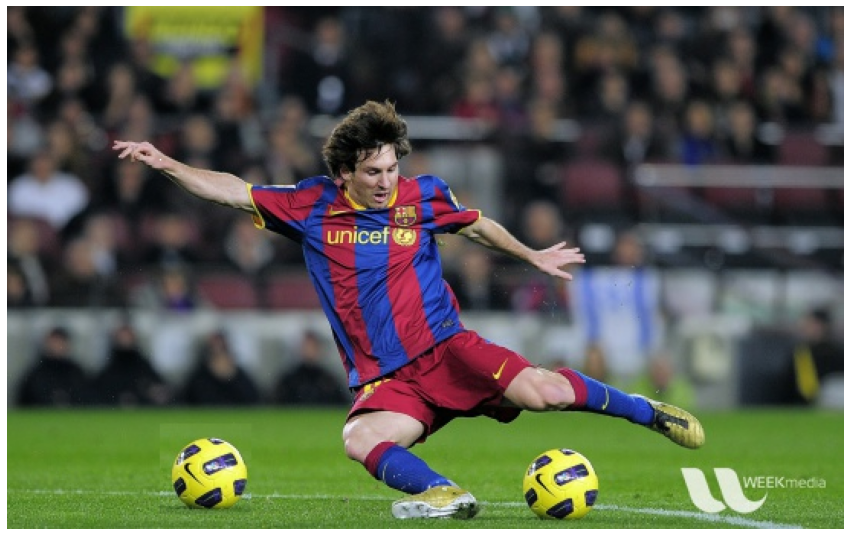

In [20]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img_rgb_added)
plt.show()

### 5. Playing with individual channels

In [21]:
img_wo_blue_channel = img_rgb.copy()
img_wo_blue_channel[:,:,2] = 0

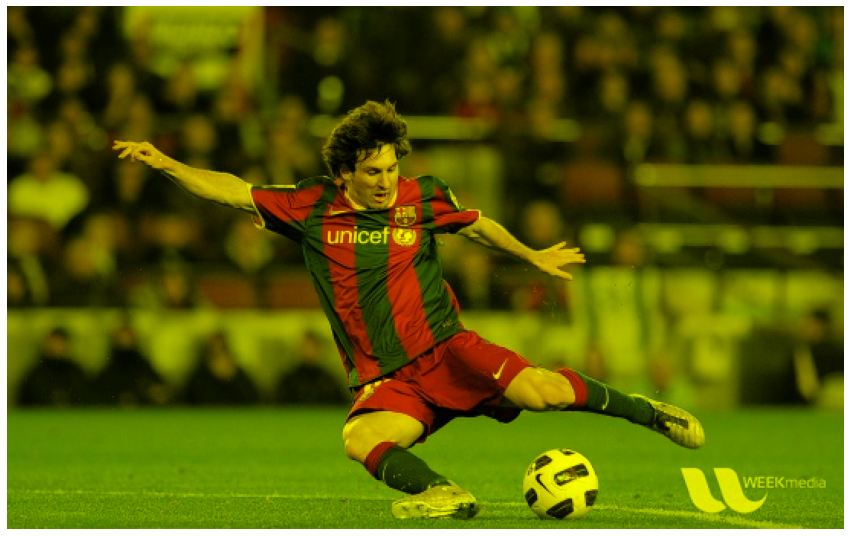

In [22]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img_wo_blue_channel)
plt.show()

### 6. Making Borders for Images (Padding)

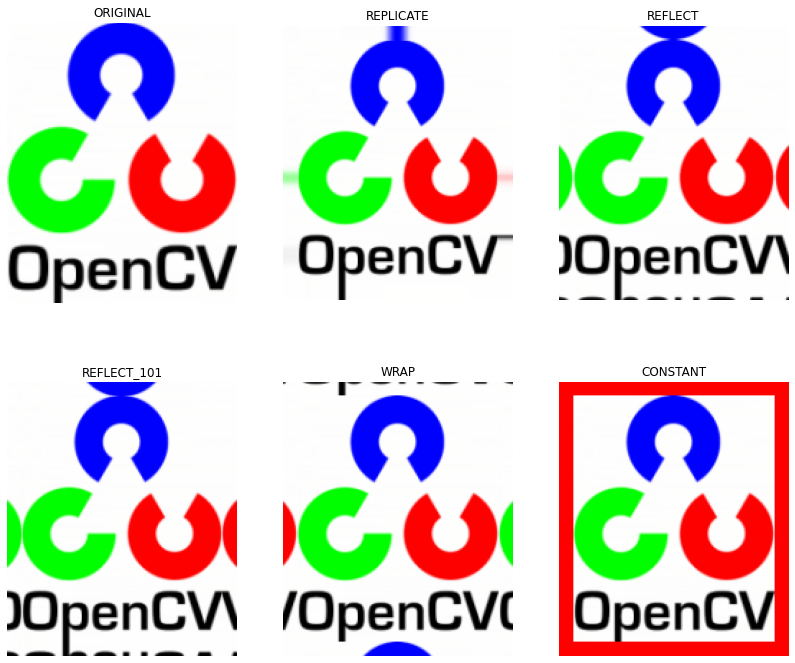

In [23]:
BLUE = [255,0,0]

img1 = cv2.imread('./resources/opencv-logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

fig = plt.figure(figsize=(14, 12))

ax1 = fig.add_subplot(231)
ax1.imshow(img1, 'gray')
ax1.axis('off')
ax1.title.set_text('ORIGINAL')

ax2 = fig.add_subplot(232)
ax2.imshow(replicate, 'gray')
ax2.axis('off')
ax2.title.set_text('REPLICATE')

ax3 = fig.add_subplot(233)
ax3.imshow(reflect, 'gray')
ax3.axis('off')
ax3.title.set_text('REFLECT')


ax4 = fig.add_subplot(234)
ax4.imshow(reflect101, 'gray')
ax4.axis('off')
ax4.title.set_text('REFLECT_101')

ax5 = fig.add_subplot(235)
ax5.imshow(wrap, 'gray')
ax5.axis('off')
ax5.title.set_text('WRAP')

ax6 = fig.add_subplot(236)
ax6.imshow(constant, 'gray')
ax6.axis('off')
ax6.title.set_text('CONSTANT')

plt.show()

____

____

### 6.b. Arithmetic Operations on Images

### 1. Image Blending

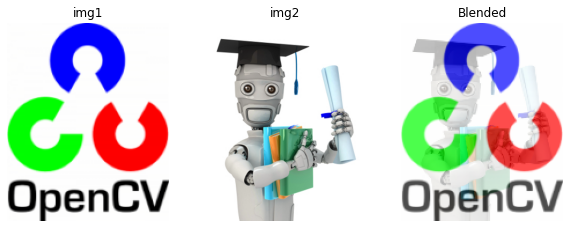

In [32]:
img2 = cv2.imread('./resources/machinelearning.jpg')
img1 = cv2.imread('./resources/opencv-logo.png')

img2_res = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

dst = cv2.addWeighted(img1,0.7,img2_res,0.3,0)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(231)
ax1.imshow(img1, 'gray')
ax1.axis('off')
ax1.title.set_text('img1')

ax2 = fig.add_subplot(232)
ax2.imshow(img2, 'gray')
ax2.axis('off')
ax2.title.set_text('img2')

ax3 = fig.add_subplot(233)
ax3.imshow(dst, 'gray')
ax3.axis('off')
ax3.title.set_text('Blended')


# plt.figure(figsize=(3, 4))
# plt.axis('off')
# plt.title('Blended')
# plt.imshow(dst)
# plt.show()

### 2. Bitwise Operations

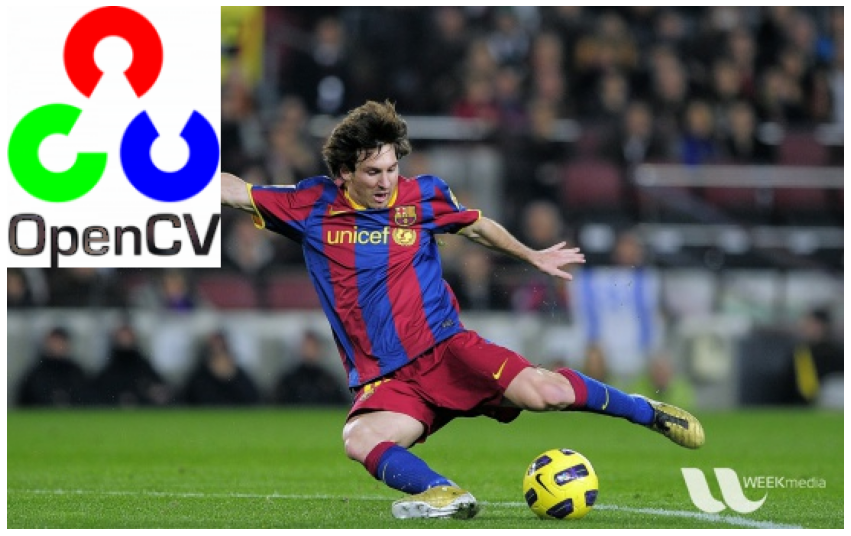

In [84]:
img1 = cv2.imread('./resources/messi.jpg')
img2 = cv2.imread('./resources/opencv-logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst


plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow((cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)))
plt.show()

## 7. Image processing in OpenCV
* Image Thresholding
* Geometric Transformations of Images

### 7.a. Image Thresholding

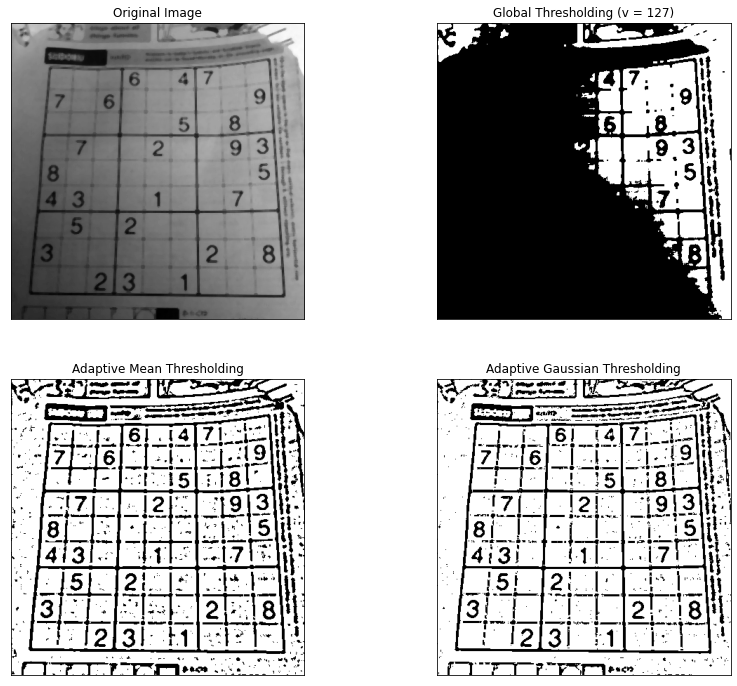

In [47]:
img = cv2.imread('./resources/sudoku.jpeg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

fig = plt.figure(figsize=(14, 12))
for i in range(0, 4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 7.b. Geometric Transformations of Images
* Scaling
* Translation
* Rotation

### 1. Scaling

In [37]:
img = cv2.imread('./resources/messi.jpg')
print('Image size before resize operation: ', img.shape)
res = cv2.resize(img, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
print('Image size after resize operation: ', res.shape)

#OR

#ight, width = img.shape[:2]
#es = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

Image size before resize operation:  (342, 548, 3)
Image size after resize operation:  (684, 1096, 3)


### 2. Translation

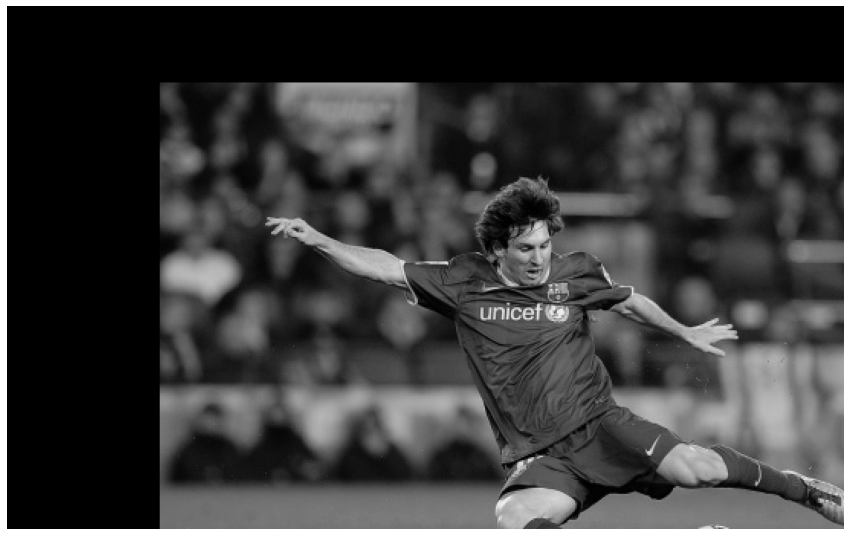

In [41]:
import cv2
import numpy as np

img = cv2.imread('./resources/messi.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))


plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow((cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)))
plt.show()

### 3. Rotation

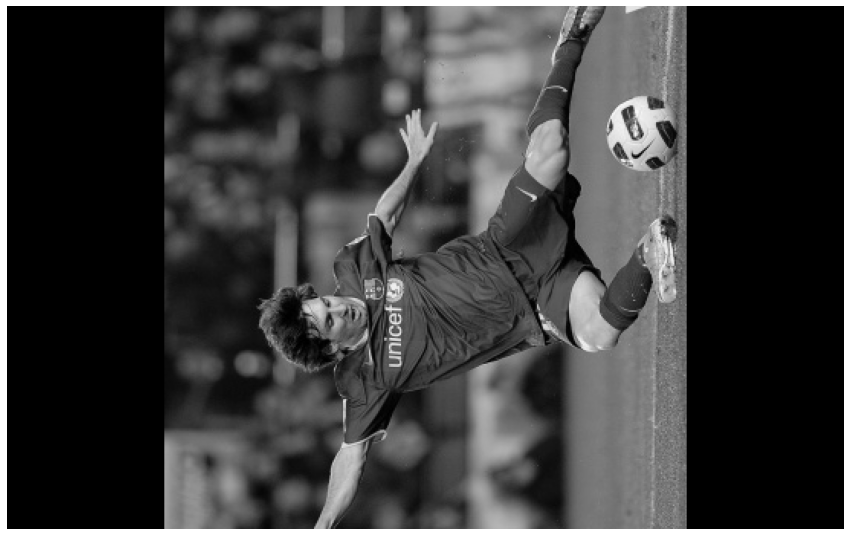

In [42]:
img = cv2.imread('./resources/messi.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow((cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)))
plt.show()

### 7.c. Image Gradients
* Sobel, Scharr, and Laplacian Derivatives

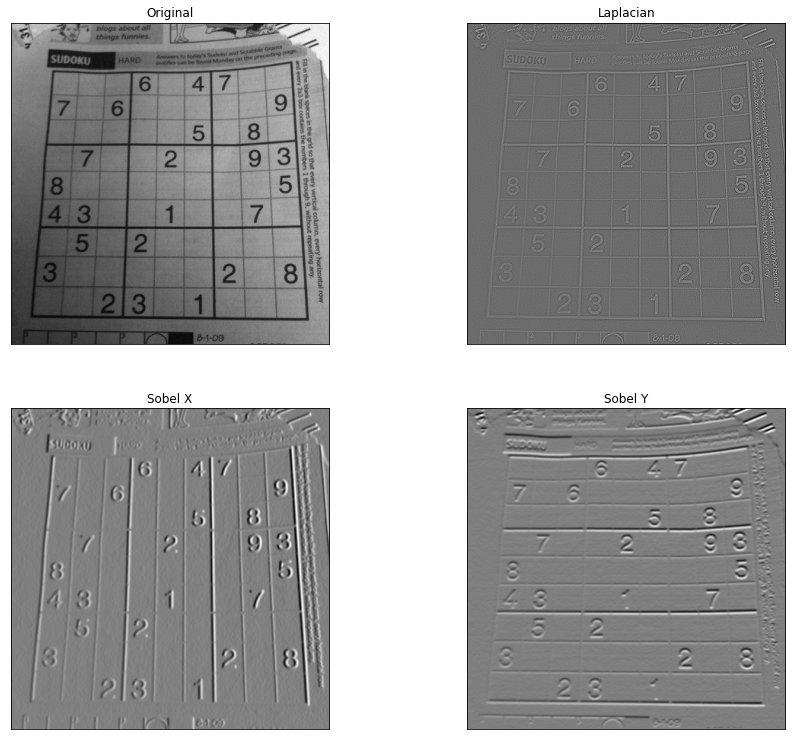

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./resources/sudoku.jpeg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

fig = plt.figure(figsize=(15, 13))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### 7.d. Canny Edge Detection

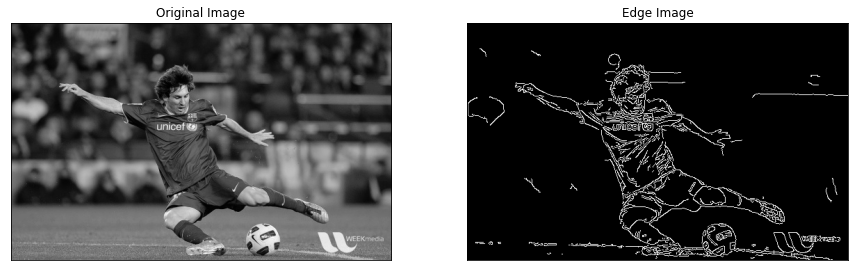

In [53]:
img = cv2.imread('./resources/messi.jpg',0)
edges = cv2.Canny(img,100,200)


fig = plt.figure(figsize=(15, 13))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

____

# Next topic: 

## What is Computer Vision?
* Computer vision is an interdisciplinary field that deals with how computers can be made to learn to have  a high-level understanding from digital images or videos.

* The ability to see and perceive the world comes naturally to us humans. It’s second nature for us to gather information from our surroundings through the gift of vision and perception.

* The idea here is to automate tasks that the human visual systems can do. So, a computer should be able to recognize objects present in an image.

* Unlike image processing, the goal is to understand what are the contents inside an image.

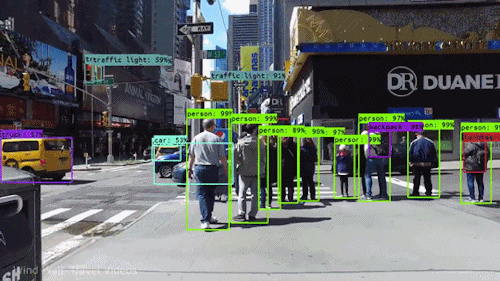

In [21]:
from IPython.display import Image
Image(filename='./resources/Image-Recoginition.gif', width=800, height=600)

=================== That's all folks! ===================